In [1]:
import pandas as pd 
import numpy as np

In [2]:
# Importing the data set
uni = pd.read_csv("C:\\Users\\Sagar S S\\Downloads\\Universities.csv")

In [4]:
uni.head(5)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
uni.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [5]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
Univ        25 non-null object
SAT         25 non-null int64
Top10       25 non-null int64
Accept      25 non-null int64
SFRatio     25 non-null int64
Expenses    25 non-null int64
GradRate    25 non-null int64
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [6]:
uni.isna().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [9]:
# Considering only numerical data 
uni.data = uni.iloc[:,1:]
uni.data.head(4)

C:\Users\Sagar S S\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88


In [10]:
# Normalizing the numerical data 
uni_normal = scale(uni.data)

In [11]:
# Applying PCA to the normalised data 
pca = PCA()
pca_values = pca.fit_transform(uni_normal)

In [12]:
pca_values.shape

(25, 6)

In [13]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [14]:
pca.components_[0]

array([-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
       -0.37940403])

In [15]:
# Cumulative variance 

var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

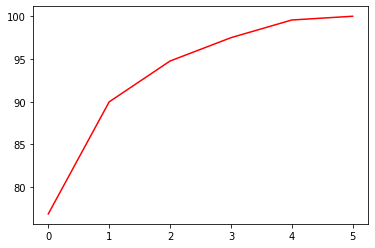

In [16]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")



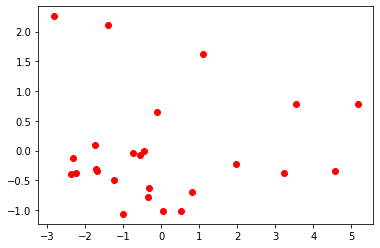

In [17]:
# plot between PCA1 and PCA2 
x = np.array(pca_values[:,0])
y = np.array(pca_values[:,1])

plt.plot(x,y,"ro")

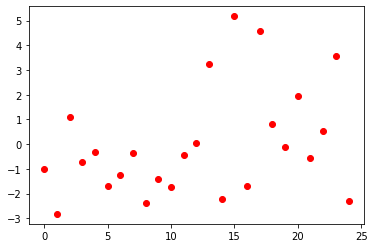

In [18]:
plt.plot(np.arange(25),x,"ro")

# Clustering

In [19]:
new_df = pd.DataFrame(pca_values[:,0:4])

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)

In [21]:
kmeans.fit(new_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
kmeans.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])